In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


**Load and manipulate data**

In [48]:

def load_data():
    URL = 'https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/diabetes_scale'      
    data = pd.read_csv(URL, header=None, sep=' ')
    
    data=data.iloc[:,0:9]
    
    for column in range(1,8):
        data[column]=[float(value.split(':')[1]) for value in data.iloc[:,column]]
       
    # Rename the columns
    data.columns = ['Label']+[f'Feature_{i}' for i in range(1, 9)]
     
    return data

data = load_data()
print(data)


     Label  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
0       -1  -0.294118   0.487437   0.180328  -0.292929  -1.000000   0.001490   
1        1  -0.882353  -0.145729   0.081967  -0.414141  -1.000000  -0.207153   
2       -1  -0.058824   0.839196   0.049180  -1.000000  -1.000000  -0.305514   
3        1  -0.882353  -0.105528   0.081967  -0.535354  -0.777778  -0.162444   
4       -1  -1.000000   0.376884  -0.344262  -0.292929  -0.602837   0.284650   
..     ...        ...        ...        ...        ...        ...        ...   
763      1   0.176471   0.015075   0.245902  -0.030303  -0.574468  -0.019374   
764      1  -0.764706   0.226131   0.147541  -0.454545  -1.000000   0.096870   
765      1  -0.411765   0.216080   0.180328  -0.535354  -0.735225  -0.219076   
766     -1  -0.882353   0.266332  -0.016393  -1.000000  -1.000000  -0.102832   
767      1  -0.882353  -0.065327   0.147541  -0.373737  -1.000000  -0.093890   

     Feature_7     Feature_8  
0    -0.

### **Data inspection**

The dataset includes 768 record

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Label      768 non-null    int64  
 1   Feature_1  768 non-null    float64
 2   Feature_2  768 non-null    float64
 3   Feature_3  768 non-null    float64
 4   Feature_4  768 non-null    float64
 5   Feature_5  768 non-null    float64
 6   Feature_6  768 non-null    float64
 7   Feature_7  768 non-null    float64
 8   Feature_8  759 non-null    object 
dtypes: float64(7), int64(1), object(1)
memory usage: 54.1+ KB


In [50]:
diabetes = pd.DataFrame(data[~data['Feature_8'].isnull()])

In [51]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 759 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Label      759 non-null    int64  
 1   Feature_1  759 non-null    float64
 2   Feature_2  759 non-null    float64
 3   Feature_3  759 non-null    float64
 4   Feature_4  759 non-null    float64
 5   Feature_5  759 non-null    float64
 6   Feature_6  759 non-null    float64
 7   Feature_7  759 non-null    float64
 8   Feature_8  759 non-null    object 
dtypes: float64(7), int64(1), object(1)
memory usage: 59.3+ KB


In [52]:
diabetes.loc[:, 'Feature_8'] = diabetes['Feature_8'].apply(lambda x: str(x).split(':')[1])

In [53]:
diabetes

,Label,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8
0,-1,-0.294118,0.487437,0.180328,-0.292929,-1.000000,0.001490,-0.531170,-0.0333333
1,1,-0.882353,-0.145729,0.081967,-0.414141,-1.000000,-0.207153,-0.766866,-0.666667
2,-1,-0.058824,0.839196,0.049180,-1.000000,-1.000000,-0.305514,-0.492741,-0.633333
3,1,-0.882353,-0.105528,0.081967,-0.535354,-0.777778,-0.162444,-0.923997,-1
4,-1,-1.000000,0.376884,-0.344262,-0.292929,-0.602837,0.284650,0.887276,-0.6
...,...,...,...,...,...,...,...,...,...
763,1,0.176471,0.015075,0.245902,-0.030303,-0.574468,-0.019374,-0.920581,0.4
764,1,-0.764706,0.226131,0.147541,-0.454545,-1.000000,0.096870,-0.776260,-0.8
765,1,-0.411765,0.216080,0.180328,-0.535354,-0.735225,-0.219076,-0.857387,-0.7
766,-1,-0.882353,0.266332,-0.016393,-1.000000,-1.000000,-0.102832,-0.768574,-0.133333


In [54]:
diabetes['Feature_8'] = pd.to_numeric(diabetes['Feature_8'], errors='coerce')

In [55]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 759 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Label      759 non-null    int64  
 1   Feature_1  759 non-null    float64
 2   Feature_2  759 non-null    float64
 3   Feature_3  759 non-null    float64
 4   Feature_4  759 non-null    float64
 5   Feature_5  759 non-null    float64
 6   Feature_6  759 non-null    float64
 7   Feature_7  759 non-null    float64
 8   Feature_8  759 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 59.3 KB


In [56]:
diabetes.describe()

,Label,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8
count,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000
mean,0.306983,-0.553902,0.211976,0.130392,-0.584860,-0.812335,-0.046738,-0.664571,-0.599166
std,0.952343,0.393479,0.321448,0.317587,0.322290,0.273006,0.235680,0.282291,0.388652
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-0.882353,-0.005025,0.016393,-1.000000,-1.000000,-0.186289,-0.858668,-0.900000
50%,1.000000,-0.647059,0.165829,0.180328,-0.535354,-0.940898,-0.046200,-0.749787,-0.733333
75%,1.000000,-0.294118,0.407035,0.311475,-0.353535,-0.703310,0.087929,-0.532878,-0.366667
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [57]:
diabetes.loc[diabetes['Label'] == -1, 'Label'] = 0

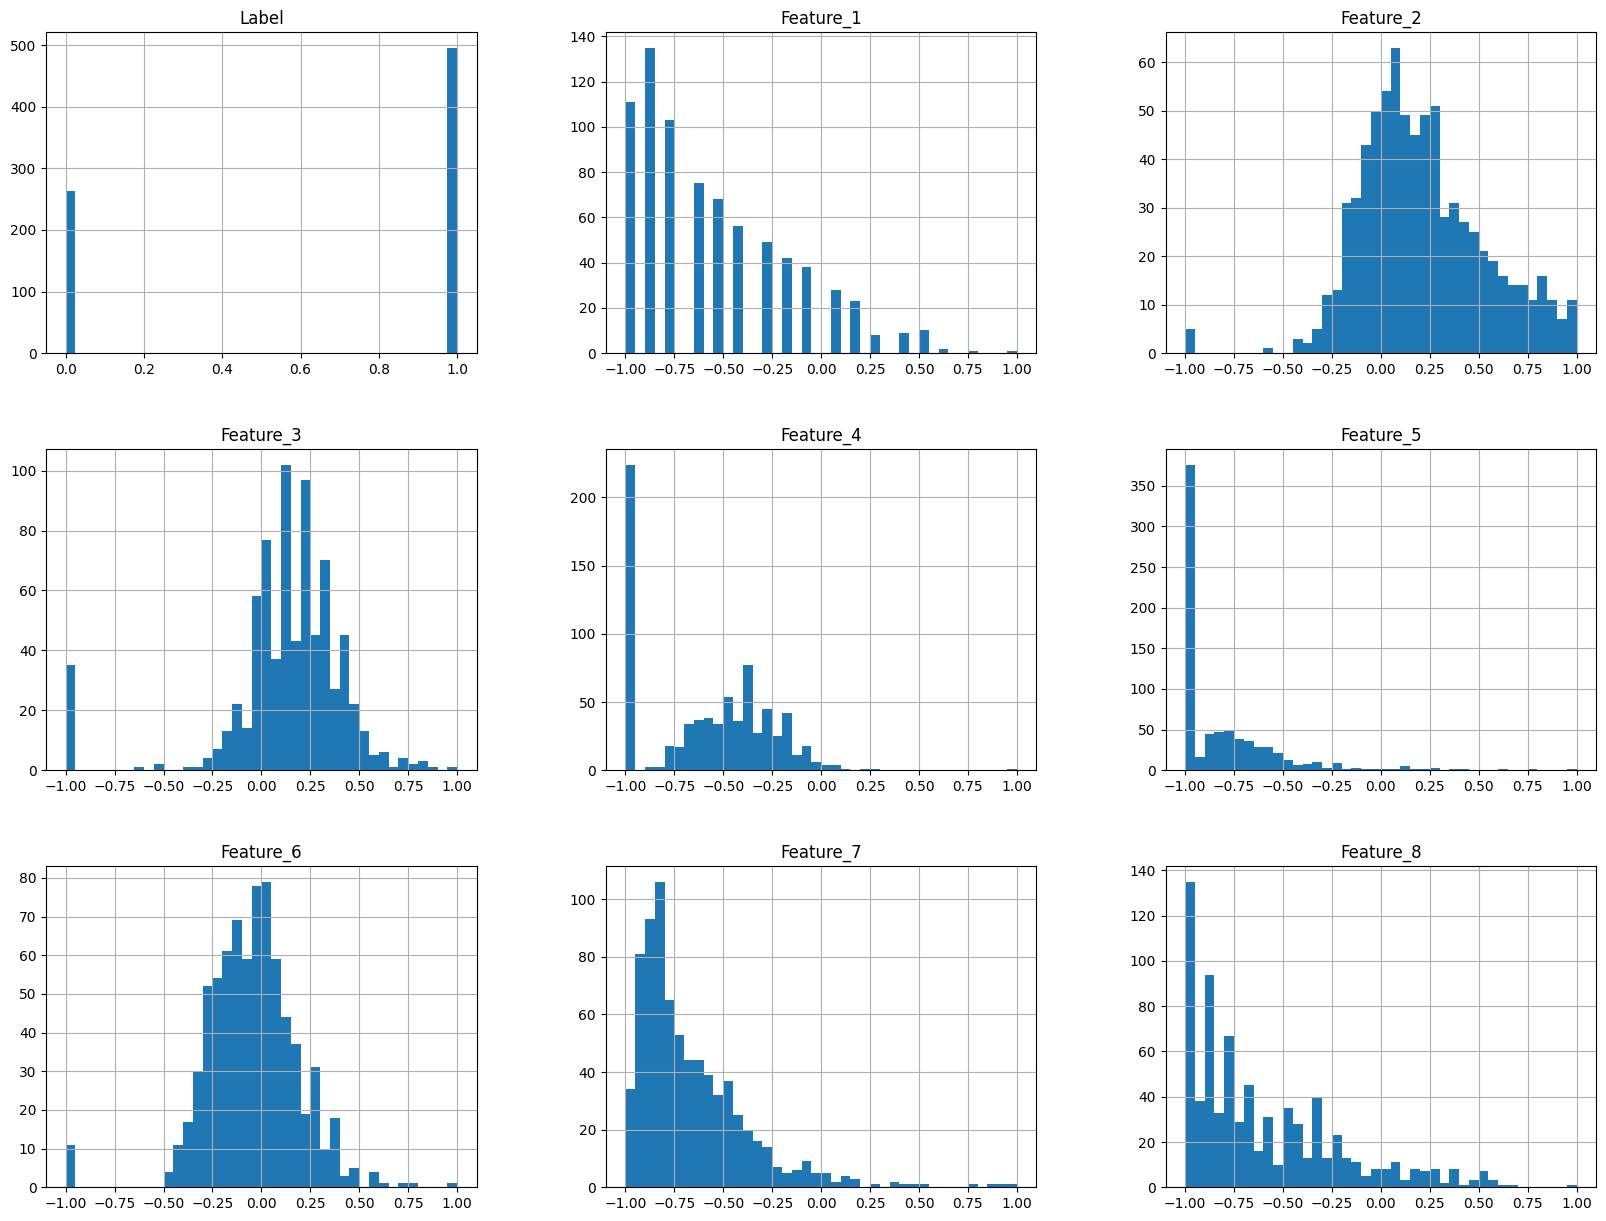

In [58]:
#Check distributions
import matplotlib as mpl
import matplotlib.pyplot as plt
graphs=diabetes.hist(bins=40,figsize=(20,15))

In [59]:
diabetes.loc[diabetes['Feature_2'] <-0.5,['Feature_2']]

,Feature_2
62,-0.557789
75,-1.000000
182,-1.000000
342,-1.000000
349,-1.000000
502,-1.000000


In [60]:
diabetes.loc[diabetes['Feature_3'] <-0.3,['Feature_3']]

,Feature_3
4,-0.344262
7,-1.000000
15,-1.000000
18,-0.508197
49,-1.000000
60,-1.000000
78,-1.000000
81,-1.000000
125,-0.508197
172,-1.000000


In [61]:
diabetes.loc[diabetes['Feature_3'] >0.83,['Feature_3']]

,Feature_3
106,1.000000
691,0.868852


In [62]:
diabetes.loc[diabetes['Feature_4'] >0.2,['Feature_4']]

,Feature_4
57,0.212121
445,0.272727
579,1.000000


In [63]:
diabetes.loc[diabetes['Feature_5'] >0,['Feature_5']]

,Feature_5
8,0.283688
13,1.000000
111,0.170213
153,0.146572
186,0.170213
220,0.130024
228,0.758865
247,0.607565
286,0.288416
370,0.099291


In [64]:
diabetes.loc[diabetes['Feature_6'] <-0.5,['Feature_6']]

,Feature_6
9,-1.0
49,-1.0
60,-1.0
81,-1.0
145,-1.0
371,-1.0
426,-1.0
494,-1.0
522,-1.0
684,-1.0


In [65]:
diabetes.loc[diabetes['Feature_6'] >0.4,['Feature_6']]

,Feature_6
84,0.454545
99,0.481371
120,0.585693
125,0.639344
154,0.427720
155,0.490313
177,1.000000
193,0.558867
247,0.558867
303,0.576751


In [66]:
diabetes.loc[diabetes['Feature_7'] >0.75,['Feature_7']]

,Feature_7
4,0.887276
228,0.922289
370,0.758326
445,1.000000


In [67]:
diabetes.loc[diabetes['Feature_8'] >0.75,['Feature_8']]

,Feature_8
459,1.0


In [68]:
diabetes.loc[diabetes['Feature_2'] <-0.5,['Feature_2']]=np.nan
diabetes.loc[diabetes['Feature_3'] <-0.3,['Feature_3']]=np.nan
diabetes.loc[diabetes['Feature_3'] >0.83,['Feature_3']]=np.nan
diabetes.loc[diabetes['Feature_4'] >0.2,['Feature_4']]=np.nan
diabetes.loc[diabetes['Feature_5'] >0,['Feature_5']]=np.nan
diabetes.loc[diabetes['Feature_6'] <-0.5,['Feature_6']]=np.nan
diabetes.loc[diabetes['Feature_6'] >0.5,['Feature_6']]=np.nan
diabetes.loc[diabetes['Feature_7'] >0.75,['Feature_7']]=np.nan
diabetes.loc[diabetes['Feature_8'] >0.75,['Feature_8']]=np.nan

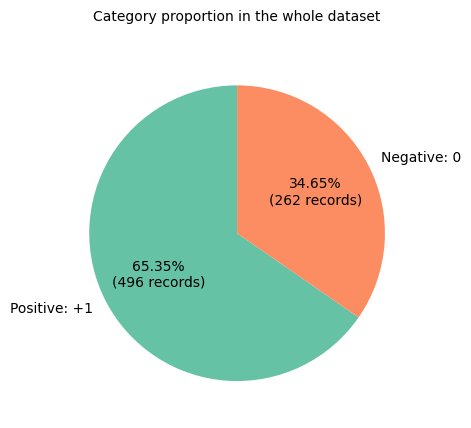

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

labels_diabetes = ['Positive: +1','Negative: 0']

label_count = diabetes['Label'].value_counts()

# Custom function to format the label
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.2f}%\n({:d} records)".format(pct, absolute)

plt.pie(x=label_count, labels=labels_diabetes, autopct=lambda pct: func(pct, label_count), textprops={'fontsize':10}, 
        colors=sns.color_palette('Set2'), startangle=90)

plt.title(
    label="Category proportion in the whole dataset", 
    fontdict={"fontsize":10},
    pad=20
)

plt.show()


In [70]:
# Your code here
c1=diabetes.loc[diabetes['Label']==+1].iloc[:, 1:]
c2=diabetes.loc[diabetes['Label']==0].iloc[:, 1:]


import numpy as np
import heapq as hp

def calculate_t_score(c1, c2):
    mean_c1 = np.mean(c1,axis=0)
    mean_c2 = np.mean(c2,axis=0)
    stddev_c1 = np.std(c1)
    stddev_c2 = np.std(c2)
    #print(stddev_c1)
    t_score = round((mean_c2 - mean_c1) / (0.5 * (stddev_c2 + stddev_c1)),4)
  
    t_score_dic =dict(t_score)
    t_score_list = [(np.abs(value), key) for key, value in t_score_dic.items()]

    hp.heapify(t_score_list)
    
    return hp.nlargest(8, t_score_list, key=lambda x: x[0])


calculate_t_score(c1, c2) #Large values for the T-score (either positive or negative) indicate discriminative ability.

[(1.1564, 'Feature_2'),
 (0.6872, 'Feature_6'),
 (0.5293, 'Feature_8'),
 (0.4557, 'Feature_1'),
 (0.3846, 'Feature_3'),
 (0.3279, 'Feature_7'),
 (0.1603, 'Feature_5'),
 (0.1185, 'Feature_4')]

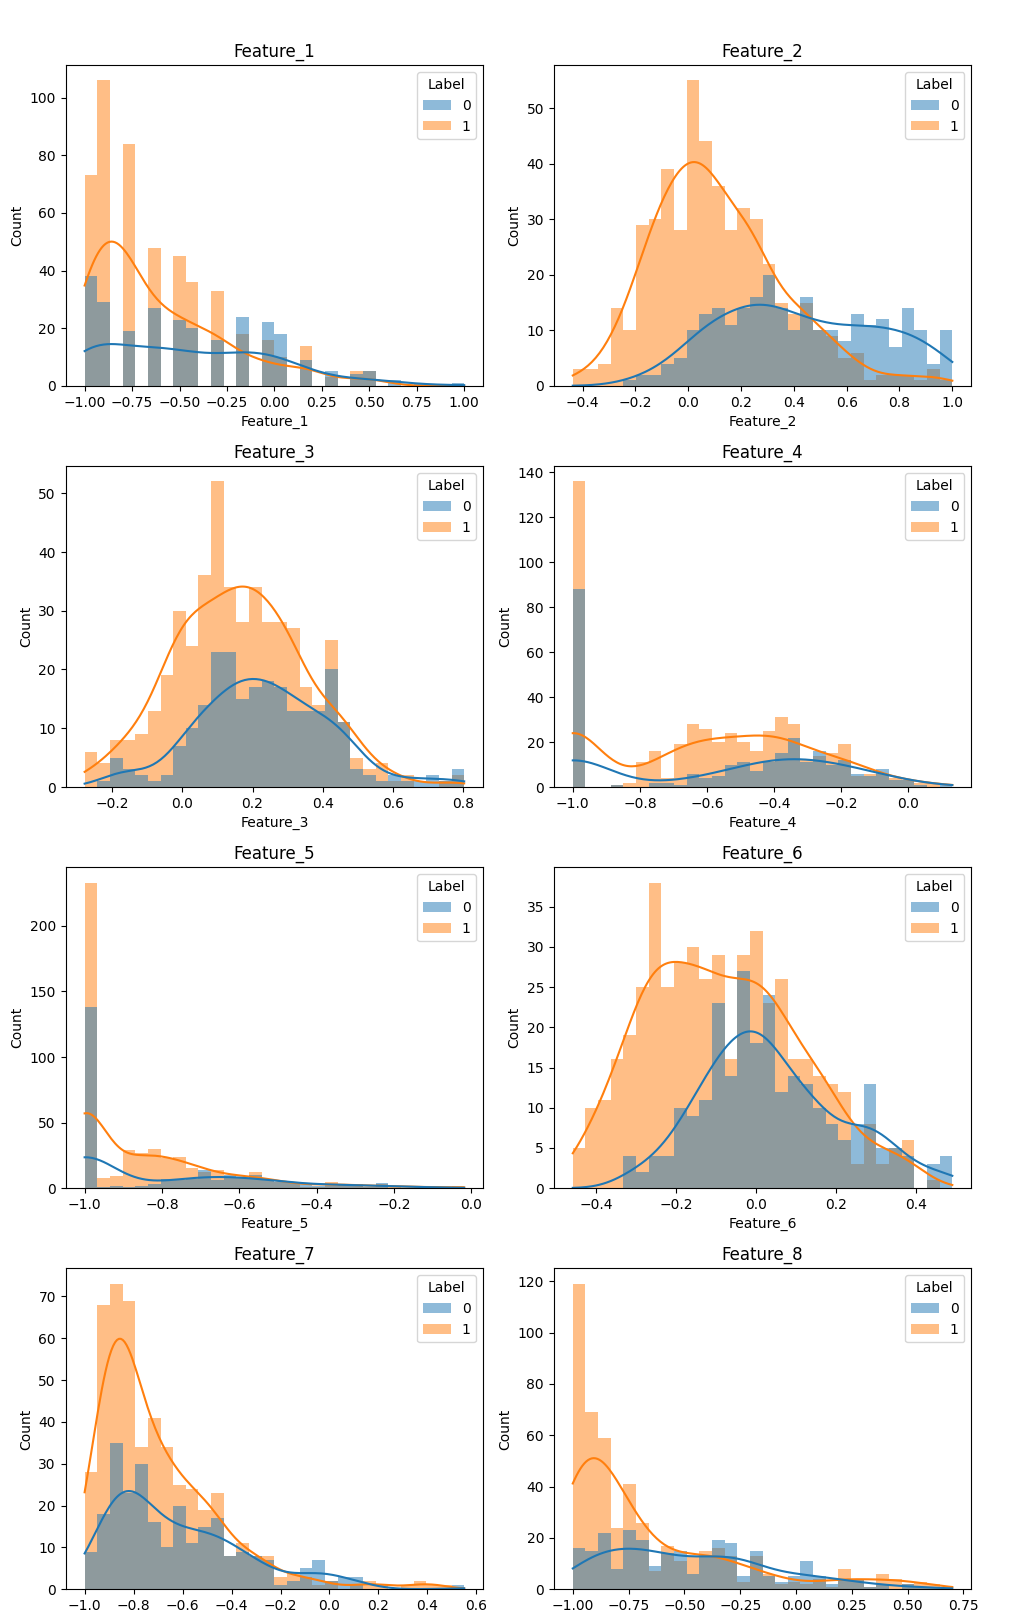

In [71]:
# Determine the number of features
n_features = 8  # Exclude the target column

# Calculate the required number of rows and columns for subplots
n_cols = 2
n_rows, remainder = divmod(n_features, n_cols)
if remainder > 0:
    n_rows += 1

# Create a figure and axes with a smaller figsize
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 4 * n_rows))

# Flatten the axes array to simplify indexing
axes = axes.flatten()

# Iterate through the features and plot histograms
for i, (feature, ax) in enumerate(zip(diabetes.columns[1:11], axes)):
    # Plot the histogram using seaborn
    sns.histplot(data=diabetes, x=feature, hue='Label', bins=30, kde=True, ax=ax, edgecolor=None)
    
    # Set the title for the subplot
    ax.set_title(feature)
    
    # Remove the x-axis label from all but the bottom subplots
    if i >= n_features - n_cols:
        ax.set_xlabel("")

    # Add the legend
    if i == 0:
        handles, labels = ax.get_legend_handles_labels()

# Adjust the layout of subplots
plt.tight_layout()

# Add a common legend
fig.legend(handles, labels, loc="lower center", bbox_to_anchor=(1, 1), ncol=3, title=None, frameon=False)

# Display the plot
plt.show()


1.1. Splitting the dataset

In [72]:
# Your code here
from sklearn.model_selection import train_test_split

# Get the test and train set
# stratify ensures that the class distribution in the original dataset is preserved in both the training and test sets
# random_state ensures the data will be split in a way that remains consistent every time you run the code with the same random seed (42 in this case).
train_set, test_set = train_test_split(diabetes,test_size=0.2,stratify=diabetes['Label'],random_state=42)
train, val = train_test_split(train_set,test_size=0.2,stratify=train_set['Label'],random_state=42)

In [73]:
# Get x and y for train, val and test
X= np.array(train.iloc[:,1:])
y = np.array(train['Label']).astype(int)

X_val= np.array(val.iloc[:,1:])
y_val = np.array(val['Label']).astype(int)

X_test = np.array(test_set.iloc[:,1:])
y_test = np.array(test_set['Label']).astype(int)

# verify the size of the set
print([X.shape,y.shape,X_val.shape,y_val.shape,X_test.shape,y_test.shape])

[(485, 8), (485,), (122, 8), (122,), (152, 8), (152,)]


In [74]:
train, val = train_test_split(train_set,test_size=0.2,stratify=train_set['Label'],random_state=42)

In [75]:
from sklearn.impute import SimpleImputer

# Instantiate the imputer
imputer = SimpleImputer(strategy="median")

# Fit the imputer on the data and transform it
X = imputer.fit_transform(X)
X_val = imputer.fit_transform(X_val)
X_test= imputer.fit_transform(X_test)
print([X.shape,y.shape,X_val.shape,y_val.shape,X_test.shape,y_test.shape])

[(485, 8), (485,), (122, 8), (122,), (152, 8), (152,)]


In [76]:
y_test

array([1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0])

Total Unique Classes in the Training set:  2


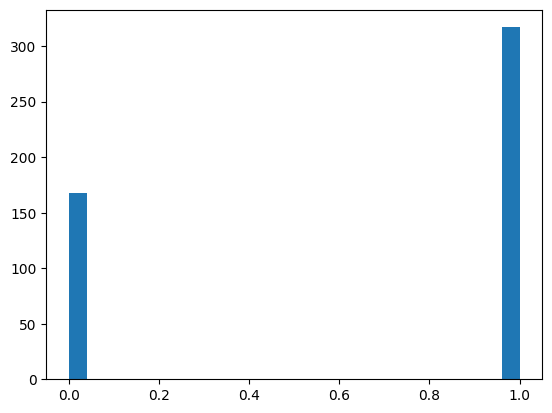

Total Unique Classes in the validation set:  2


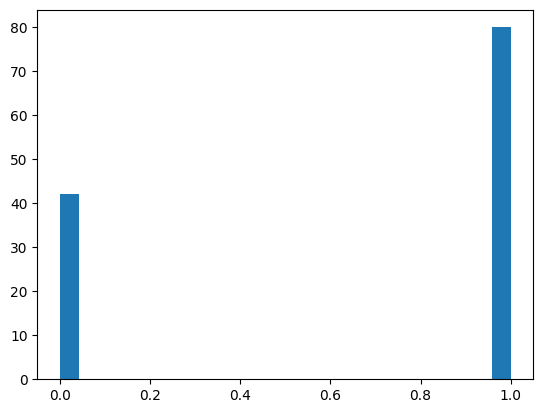

Total Unique Classes in the test set:  2


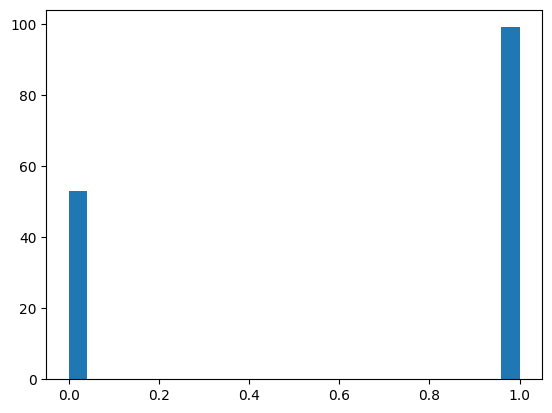

In [77]:
# Check number of classes
unique_total = np.unique(y).shape[0]
print("Total Unique Classes in the Training set: ", unique_total)

# Let's look at the distribution of labels in the training, validation and test sets
plt.hist(y, bins=25)
plt.show()

unique_total_val = np.unique(y_val).shape[0]
print("Total Unique Classes in the validation set: ", unique_total_val)

plt.hist(y_val, bins=24)
plt.show()

unique_total_test = np.unique(y_test).shape[0]
print("Total Unique Classes in the test set: ", unique_total_test)

plt.hist(y_test,bins=24)
plt.show()

In [78]:
import numpy as np
import tensorflow as tf
from tensorflow import keras


# Load your dataset and preprocess it as needed
# For example, load X (features) and y (labels)

# Create an MLP model
model = keras.models.Sequential(tf.random.set_seed(42))
model.add(keras.layers.Dense(256, activation='tanh', input_shape=(8,)))

model.add(keras.layers.Dropout(0.5))  # Consider adding dropout for regularization
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(128, activation='tanh'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(64, activation='tanh'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(32, activation='tanh'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(16, activation='tanh'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(8, activation='tanh'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(1, activation='sigmoid'))# For binary classification


In [79]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 256)               2304      
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 batch_normalization_6 (Bat  (None, 256)               1024      
 chNormalization)                                                
                                                                 
 dense_8 (Dense)             (None, 128)               32896     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 batch_normalization_7 (Bat  (None, 128)               512       
 chNormalization)                                     

Optimization

In [80]:
epochs=120
batchsize=32
learningrate=0.01
optimizer=keras.optimizers.SGD

In [81]:

def tune_hyperparamiter(epochs,batchsize,optimizer, learningrate):
    # Compile the model
    from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
    model.compile(optimizer=optimizer(learningrate),
              loss='binary_crossentropy',
              metrics=['accuracy'])

    # Define early stopping & model checkpointing
    early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)
    
    history = model.fit(X, y,
                    epochs=epochs,              
                    batch_size=batchsize,          # Using mini-batch gradient descent
                    validation_data=(X_val, y_val),
                    callbacks=[early_stopping],
                    verbose=1)  
          
    
    max_val_acc = np.max(history.history['val_accuracy'])
    
    return(max_val_acc, history, model)

In [82]:
def plot_history(history):
    # Plot the results (shifting validation curves appropriately)
    plt.figure(figsize=(8,5))
    n = len(history.history['accuracy'])
    plt.plot(np.arange(0,n),history.history['accuracy'], color='orange')
    plt.plot(np.arange(0,n),history.history['loss'],'b')
    plt.plot(np.arange(0,n)+0.5,history.history['val_accuracy'],'r')  # offset both validation curves
    plt.plot(np.arange(0,n)+0.5,history.history['val_loss'],'g')
    plt.legend(['Train Acc','Train Loss','Val Acc','Val Loss'])
    plt.grid(True)
    plt.show() 

Epoch 1/120


16/16 [==============================] - 4s 30ms/step - loss: 0.8093 - accuracy: 0.5320 - val_loss: 0.6588 - val_accuracy: 0.7049
Epoch 2/120
16/16 [==============================] - 0s 8ms/step - loss: 0.7237 - accuracy: 0.5938 - val_loss: 0.6321 - val_accuracy: 0.6967
Epoch 3/120
16/16 [==============================] - 0s 9ms/step - loss: 0.6959 - accuracy: 0.5876 - val_loss: 0.6088 - val_accuracy: 0.7131
Epoch 4/120
16/16 [==============================] - 0s 8ms/step - loss: 0.6699 - accuracy: 0.5959 - val_loss: 0.5809 - val_accuracy: 0.6967
Epoch 5/120
16/16 [==============================] - 0s 8ms/step - loss: 0.6650 - accuracy: 0.6124 - val_loss: 0.5645 - val_accuracy: 0.7049
Epoch 6/120
16/16 [==============================] - 0s 8ms/step - loss: 0.6568 - accuracy: 0.6392 - val_loss: 0.5534 - val_accuracy: 0.7213
Epoch 7/120
16/16 [==============================] - 0s 8ms/step - loss: 0.6526 - accuracy: 0.6247 - val_loss: 0.5396 - val_accuracy: 0.7131
Epoch 8/120
16/16 [=====

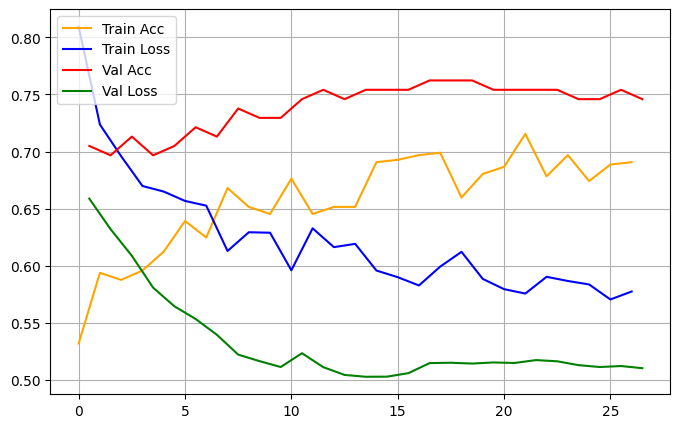

Epoch 1/120
16/16 [==============================] - 4s 28ms/step - loss: 0.5673 - accuracy: 0.7010 - val_loss: 0.6038 - val_accuracy: 0.7295
Epoch 2/120
16/16 [==============================] - 0s 8ms/step - loss: 0.5295 - accuracy: 0.7505 - val_loss: 0.5727 - val_accuracy: 0.7377
Epoch 3/120
16/16 [==============================] - 0s 8ms/step - loss: 0.5460 - accuracy: 0.7299 - val_loss: 0.5451 - val_accuracy: 0.7377
Epoch 4/120
16/16 [==============================] - 0s 8ms/step - loss: 0.5206 - accuracy: 0.7485 - val_loss: 0.5537 - val_accuracy: 0.7295
Epoch 5/120
16/16 [==============================] - 0s 8ms/step - loss: 0.5438 - accuracy: 0.7381 - val_loss: 0.5004 - val_accuracy: 0.7131
Epoch 6/120
16/16 [==============================] - 0s 9ms/step - loss: 0.5326 - accuracy: 0.7361 - val_loss: 0.5264 - val_accuracy: 0.6885
Epoch 7/120
16/16 [==============================] - 0s 8ms/step - loss: 0.5511 - accuracy: 0.7134 - val_loss: 0.5063 - val_accuracy: 0.7377
Epoch 8/120


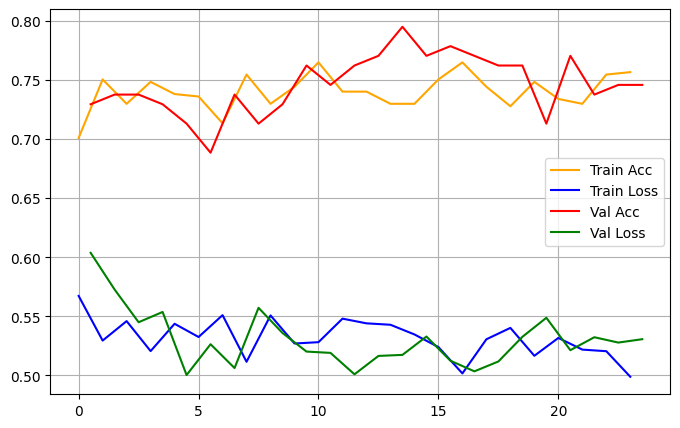

Epoch 1/120
16/16 [==============================] - 3s 28ms/step - loss: 0.5149 - accuracy: 0.7670 - val_loss: 0.5626 - val_accuracy: 0.7623
Epoch 2/120
16/16 [==============================] - 0s 7ms/step - loss: 0.4965 - accuracy: 0.7773 - val_loss: 0.5532 - val_accuracy: 0.7541
Epoch 3/120
16/16 [==============================] - 0s 8ms/step - loss: 0.4916 - accuracy: 0.7691 - val_loss: 0.5655 - val_accuracy: 0.7623
Epoch 4/120
16/16 [==============================] - 0s 9ms/step - loss: 0.5091 - accuracy: 0.7423 - val_loss: 0.5191 - val_accuracy: 0.7787
Epoch 5/120
16/16 [==============================] - 0s 8ms/step - loss: 0.5374 - accuracy: 0.7175 - val_loss: 0.5336 - val_accuracy: 0.7459
Epoch 6/120
16/16 [==============================] - 0s 8ms/step - loss: 0.5015 - accuracy: 0.7691 - val_loss: 0.5364 - val_accuracy: 0.7541
Epoch 7/120
16/16 [==============================] - 0s 8ms/step - loss: 0.4942 - accuracy: 0.7691 - val_loss: 0.5509 - val_accuracy: 0.7377
Epoch 8/120


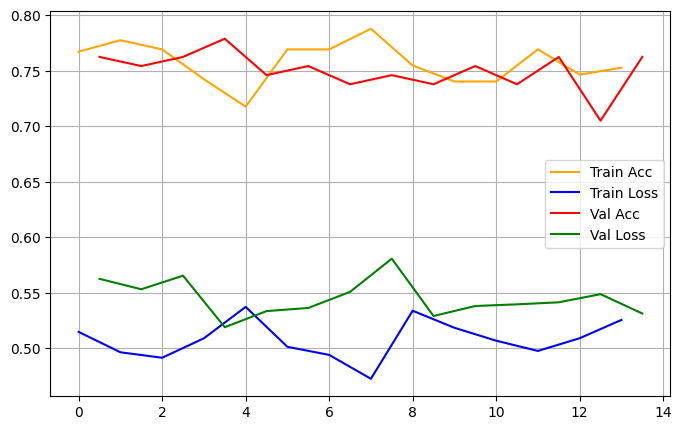

Epoch 1/120
16/16 [==============================] - 6s 29ms/step - loss: 0.4035 - accuracy: 0.8165 - val_loss: 0.6215 - val_accuracy: 0.7459
Epoch 2/120
16/16 [==============================] - 0s 9ms/step - loss: 0.4039 - accuracy: 0.8289 - val_loss: 0.6233 - val_accuracy: 0.7459
Epoch 3/120
16/16 [==============================] - 0s 10ms/step - loss: 0.4485 - accuracy: 0.7938 - val_loss: 0.5812 - val_accuracy: 0.7623
Epoch 4/120
16/16 [==============================] - 0s 9ms/step - loss: 0.4602 - accuracy: 0.7835 - val_loss: 0.5589 - val_accuracy: 0.7541
Epoch 5/120
16/16 [==============================] - 0s 9ms/step - loss: 0.5247 - accuracy: 0.7485 - val_loss: 0.5334 - val_accuracy: 0.7377
Epoch 6/120
16/16 [==============================] - 0s 8ms/step - loss: 0.4905 - accuracy: 0.7835 - val_loss: 0.5435 - val_accuracy: 0.7459
Epoch 7/120
16/16 [==============================] - 0s 8ms/step - loss: 0.5329 - accuracy: 0.7423 - val_loss: 0.5341 - val_accuracy: 0.7295
Epoch 8/120

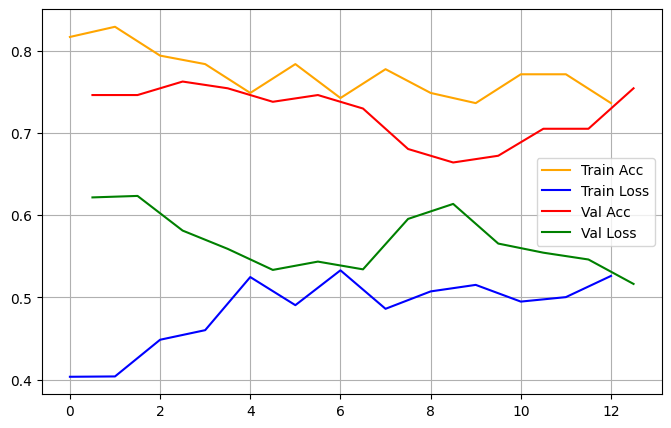

[[<class 'keras.src.optimizers.sgd.SGD'>, 0.7622950673103333], [<class 'keras.src.optimizers.adam.Adam'>, 0.7950819730758667], [<class 'keras.src.optimizers.rmsprop.RMSprop'>, 0.7786885499954224], [<class 'keras.src.optimizers.nadam.Nadam'>, 0.7622950673103333]]


In [83]:
#Optimizers
res=[]
optimizer= [[keras.optimizers.SGD,0.01], [keras.optimizers.Adam,0.01],[keras.optimizers.RMSprop, 0.01], [keras.optimizers.Nadam, 0.01]]
for optimizer,lr in optimizer:
    valacc, history, model = tune_hyperparamiter(epochs,batchsize,optimizer, learningrate)
    plot_history(history)
    res += [[optimizer, valacc]]
    
print(res)

Epoch 1/120
16/16 [==============================] - 6s 28ms/step - loss: 0.3415 - accuracy: 0.8619 - val_loss: 0.6966 - val_accuracy: 0.7377
Epoch 2/120
16/16 [==============================] - 0s 9ms/step - loss: 0.3103 - accuracy: 0.8804 - val_loss: 0.6563 - val_accuracy: 0.7623
Epoch 3/120
16/16 [==============================] - 0s 8ms/step - loss: 0.3751 - accuracy: 0.8474 - val_loss: 0.5790 - val_accuracy: 0.7705
Epoch 4/120
16/16 [==============================] - 0s 8ms/step - loss: 0.4845 - accuracy: 0.7711 - val_loss: 0.5001 - val_accuracy: 0.7869
Epoch 5/120
16/16 [==============================] - 0s 7ms/step - loss: 0.5419 - accuracy: 0.7237 - val_loss: 0.5113 - val_accuracy: 0.7623
Epoch 6/120
16/16 [==============================] - 0s 8ms/step - loss: 0.5210 - accuracy: 0.7505 - val_loss: 0.5107 - val_accuracy: 0.7787
Epoch 7/120
16/16 [==============================] - 0s 9ms/step - loss: 0.5260 - accuracy: 0.7485 - val_loss: 0.4895 - val_accuracy: 0.8033
Epoch 8/120


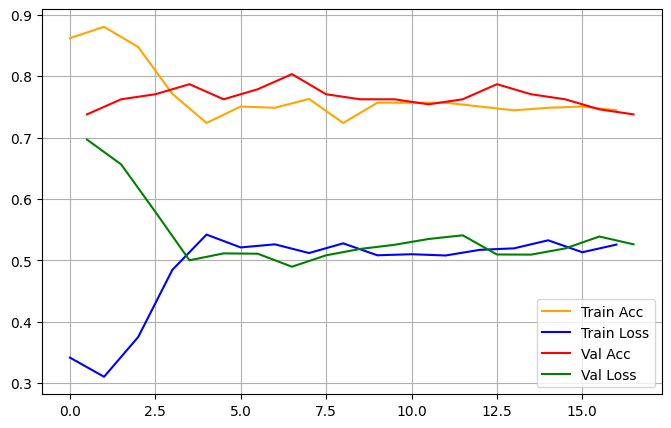

Epoch 1/120
16/16 [==============================] - 6s 27ms/step - loss: 0.3694 - accuracy: 0.8577 - val_loss: 0.5810 - val_accuracy: 0.7787
Epoch 2/120
16/16 [==============================] - 0s 8ms/step - loss: 0.3290 - accuracy: 0.8845 - val_loss: 0.6677 - val_accuracy: 0.7459
Epoch 3/120
16/16 [==============================] - 0s 8ms/step - loss: 0.3953 - accuracy: 0.8371 - val_loss: 0.5916 - val_accuracy: 0.7377
Epoch 4/120
16/16 [==============================] - 0s 7ms/step - loss: 0.4515 - accuracy: 0.8041 - val_loss: 0.5598 - val_accuracy: 0.7541
Epoch 5/120
16/16 [==============================] - 0s 7ms/step - loss: 0.5078 - accuracy: 0.7340 - val_loss: 0.5308 - val_accuracy: 0.7541
Epoch 6/120
16/16 [==============================] - 0s 7ms/step - loss: 0.4909 - accuracy: 0.7732 - val_loss: 0.5492 - val_accuracy: 0.7459
Epoch 7/120
16/16 [==============================] - 0s 8ms/step - loss: 0.4994 - accuracy: 0.7588 - val_loss: 0.5394 - val_accuracy: 0.7459
Epoch 8/120


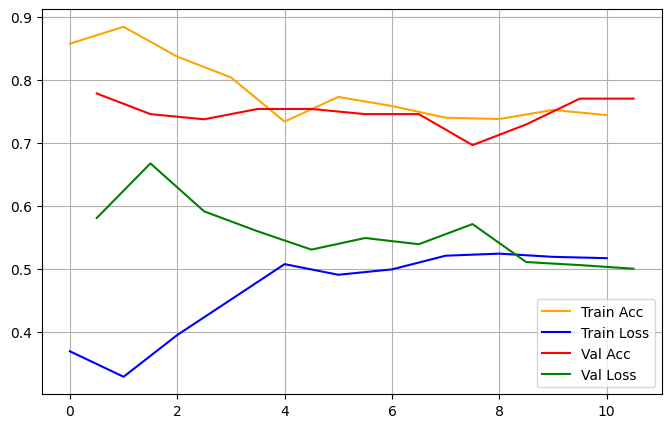

Epoch 1/120
16/16 [==============================] - 6s 28ms/step - loss: 0.2431 - accuracy: 0.9175 - val_loss: 0.7905 - val_accuracy: 0.7787
Epoch 2/120
16/16 [==============================] - 0s 8ms/step - loss: 0.3660 - accuracy: 0.8660 - val_loss: 0.7419 - val_accuracy: 0.7623
Epoch 3/120
16/16 [==============================] - 0s 7ms/step - loss: 0.3868 - accuracy: 0.8392 - val_loss: 0.6837 - val_accuracy: 0.7459
Epoch 4/120
16/16 [==============================] - 0s 8ms/step - loss: 0.4238 - accuracy: 0.8124 - val_loss: 0.5418 - val_accuracy: 0.7459
Epoch 5/120
16/16 [==============================] - 0s 7ms/step - loss: 0.4982 - accuracy: 0.7649 - val_loss: 0.5269 - val_accuracy: 0.7623
Epoch 6/120
16/16 [==============================] - 0s 8ms/step - loss: 0.4865 - accuracy: 0.7670 - val_loss: 0.5716 - val_accuracy: 0.7131
Epoch 7/120
16/16 [==============================] - 0s 8ms/step - loss: 0.4933 - accuracy: 0.7773 - val_loss: 0.5485 - val_accuracy: 0.7459
Epoch 8/120


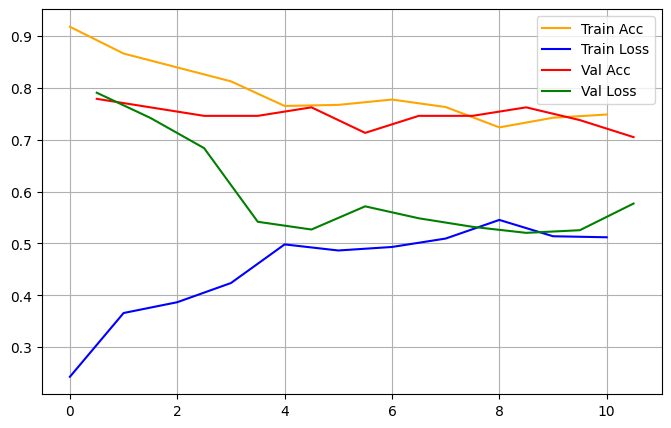

Epoch 1/120
16/16 [==============================] - 7s 30ms/step - loss: 0.1720 - accuracy: 0.9464 - val_loss: 0.8933 - val_accuracy: 0.7623
Epoch 2/120
16/16 [==============================] - 0s 8ms/step - loss: 0.3689 - accuracy: 0.8722 - val_loss: 0.7451 - val_accuracy: 0.7295
Epoch 3/120
16/16 [==============================] - 0s 7ms/step - loss: 0.4207 - accuracy: 0.8186 - val_loss: 0.5946 - val_accuracy: 0.7541
Epoch 4/120
16/16 [==============================] - 0s 7ms/step - loss: 0.4454 - accuracy: 0.7938 - val_loss: 0.5403 - val_accuracy: 0.7541
Epoch 5/120
16/16 [==============================] - 0s 8ms/step - loss: 0.4727 - accuracy: 0.7567 - val_loss: 0.5313 - val_accuracy: 0.7459
Epoch 6/120
16/16 [==============================] - 0s 8ms/step - loss: 0.4782 - accuracy: 0.7608 - val_loss: 0.5437 - val_accuracy: 0.7459
Epoch 7/120
16/16 [==============================] - 0s 8ms/step - loss: 0.4885 - accuracy: 0.7732 - val_loss: 0.5087 - val_accuracy: 0.7705
Epoch 8/120


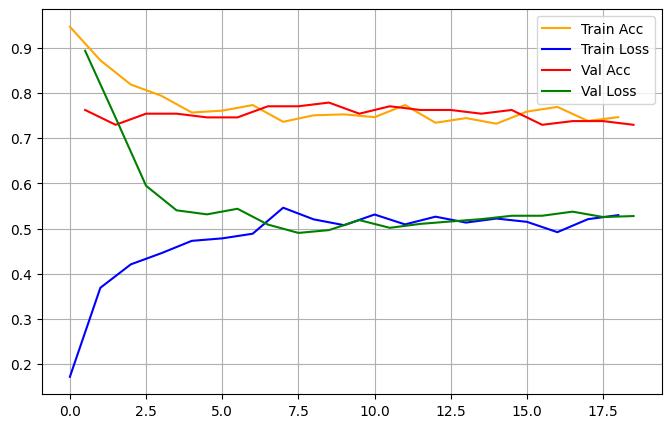

Epoch 1/120
16/16 [==============================] - 6s 26ms/step - loss: 0.3765 - accuracy: 0.8515 - val_loss: 0.5412 - val_accuracy: 0.7869
Epoch 2/120
16/16 [==============================] - 0s 10ms/step - loss: 0.3802 - accuracy: 0.8371 - val_loss: 0.6887 - val_accuracy: 0.7541
Epoch 3/120
16/16 [==============================] - 0s 10ms/step - loss: 0.3612 - accuracy: 0.8412 - val_loss: 0.7114 - val_accuracy: 0.7459
Epoch 4/120
16/16 [==============================] - 0s 9ms/step - loss: 0.4465 - accuracy: 0.7979 - val_loss: 0.6460 - val_accuracy: 0.7623
Epoch 5/120
16/16 [==============================] - 0s 8ms/step - loss: 0.4544 - accuracy: 0.7856 - val_loss: 0.5615 - val_accuracy: 0.7213
Epoch 6/120
16/16 [==============================] - 0s 8ms/step - loss: 0.4481 - accuracy: 0.8062 - val_loss: 0.5996 - val_accuracy: 0.7623
Epoch 7/120
16/16 [==============================] - 0s 9ms/step - loss: 0.4615 - accuracy: 0.7835 - val_loss: 0.5247 - val_accuracy: 0.7869
Epoch 8/12

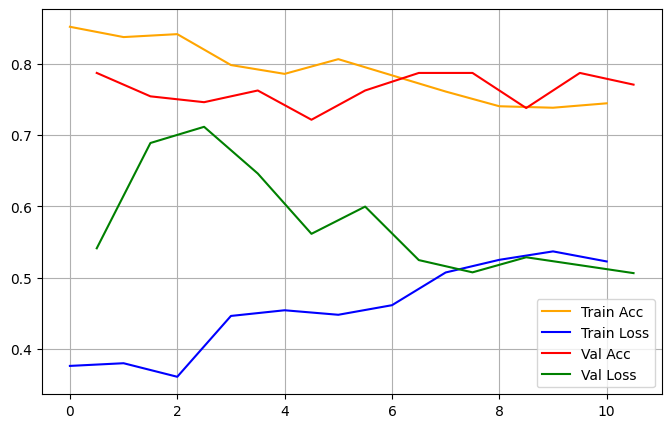

[[0.01, 0.8032786846160889], [0.001, 0.7786885499954224], [0.0001, 0.7786885499954224], [1e-05, 0.7786885499954224], [1.0000000000000002e-06, 0.7868852615356445]]


In [84]:
# Learning rate
res=[]
for lr in [1,0.1, 0.01,0.001,0.0001]:
    valacc, history, discard = tune_hyperparamiter(epochs,batchsize,optimizer, learningrate)
    plot_history(history)
    res += [[lr*learningrate,valacc]]
print(res)

Epoch 1/8
16/16 [==============================] - 7s 28ms/step - loss: 0.2515 - accuracy: 0.9196 - val_loss: 0.7077 - val_accuracy: 0.7623
Epoch 2/8
16/16 [==============================] - 0s 8ms/step - loss: 0.4077 - accuracy: 0.8309 - val_loss: 0.6483 - val_accuracy: 0.7377
Epoch 3/8
16/16 [==============================] - 0s 9ms/step - loss: 0.3816 - accuracy: 0.8392 - val_loss: 0.6578 - val_accuracy: 0.7787
Epoch 4/8
16/16 [==============================] - 0s 8ms/step - loss: 0.4044 - accuracy: 0.8186 - val_loss: 0.5841 - val_accuracy: 0.7541
Epoch 5/8
16/16 [==============================] - 0s 8ms/step - loss: 0.4986 - accuracy: 0.7732 - val_loss: 0.5047 - val_accuracy: 0.7705
Epoch 6/8
16/16 [==============================] - 0s 8ms/step - loss: 0.4743 - accuracy: 0.7649 - val_loss: 0.4961 - val_accuracy: 0.7623
Epoch 7/8
16/16 [==============================] - 0s 9ms/step - loss: 0.4650 - accuracy: 0.7918 - val_loss: 0.5223 - val_accuracy: 0.7377
Epoch 8/8
16/16 [=========

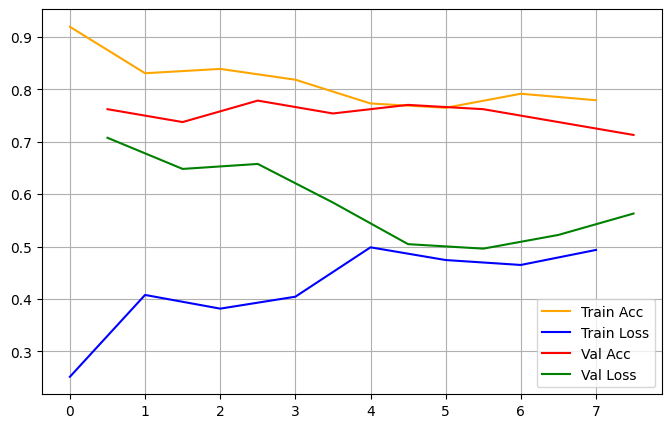

Epoch 1/10
16/16 [==============================] - 6s 27ms/step - loss: 0.3169 - accuracy: 0.8722 - val_loss: 0.6817 - val_accuracy: 0.7131
Epoch 2/10
16/16 [==============================] - 0s 7ms/step - loss: 0.3452 - accuracy: 0.8680 - val_loss: 0.6677 - val_accuracy: 0.6967
Epoch 3/10
16/16 [==============================] - 0s 8ms/step - loss: 0.3669 - accuracy: 0.8536 - val_loss: 0.5526 - val_accuracy: 0.7869
Epoch 4/10
16/16 [==============================] - 0s 7ms/step - loss: 0.4007 - accuracy: 0.8289 - val_loss: 0.6089 - val_accuracy: 0.7541
Epoch 5/10
16/16 [==============================] - 0s 7ms/step - loss: 0.4577 - accuracy: 0.8000 - val_loss: 0.5568 - val_accuracy: 0.7295
Epoch 6/10
16/16 [==============================] - 0s 7ms/step - loss: 0.4114 - accuracy: 0.8206 - val_loss: 0.5251 - val_accuracy: 0.7459
Epoch 7/10
16/16 [==============================] - 0s 7ms/step - loss: 0.4537 - accuracy: 0.7856 - val_loss: 0.5344 - val_accuracy: 0.7377
Epoch 8/10
16/16 [=

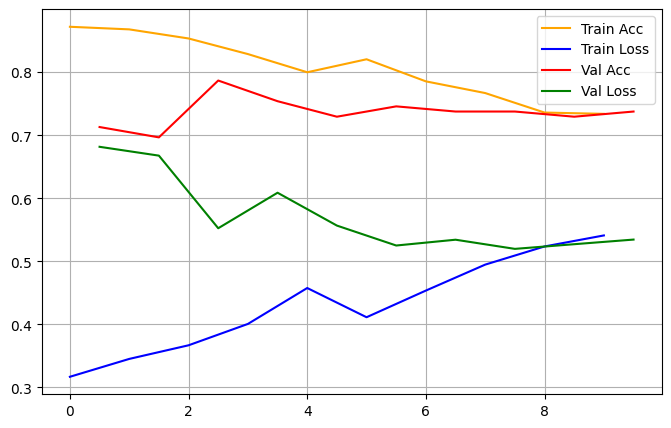

Epoch 1/20
16/16 [==============================] - 6s 27ms/step - loss: 0.3479 - accuracy: 0.8722 - val_loss: 0.6305 - val_accuracy: 0.7541
Epoch 2/20
16/16 [==============================] - 0s 7ms/step - loss: 0.3541 - accuracy: 0.8536 - val_loss: 0.6175 - val_accuracy: 0.7705
Epoch 3/20
16/16 [==============================] - 0s 7ms/step - loss: 0.3829 - accuracy: 0.8433 - val_loss: 0.6779 - val_accuracy: 0.7377
Epoch 4/20
16/16 [==============================] - 0s 8ms/step - loss: 0.3662 - accuracy: 0.8309 - val_loss: 0.6779 - val_accuracy: 0.7295
Epoch 5/20
16/16 [==============================] - 0s 7ms/step - loss: 0.4354 - accuracy: 0.8082 - val_loss: 0.6027 - val_accuracy: 0.7295
Epoch 6/20
16/16 [==============================] - 0s 7ms/step - loss: 0.4488 - accuracy: 0.7876 - val_loss: 0.5773 - val_accuracy: 0.7131
Epoch 7/20
16/16 [==============================] - 0s 8ms/step - loss: 0.4427 - accuracy: 0.7897 - val_loss: 0.5856 - val_accuracy: 0.7459
Epoch 8/20
16/16 [=

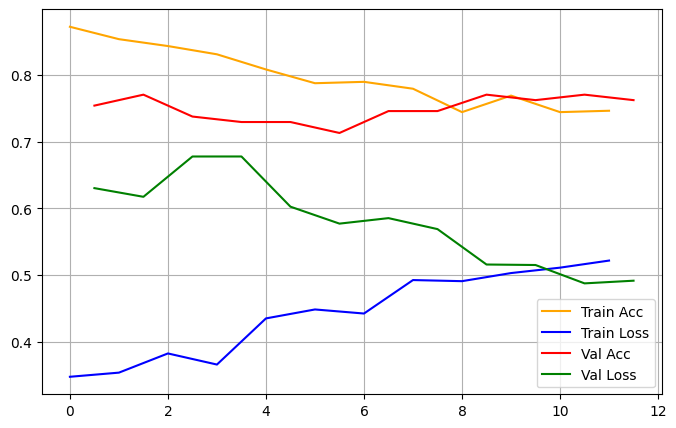

Epoch 1/50
16/16 [==============================] - 6s 28ms/step - loss: 0.2360 - accuracy: 0.8969 - val_loss: 0.7524 - val_accuracy: 0.7459
Epoch 2/50
16/16 [==============================] - 0s 8ms/step - loss: 0.2542 - accuracy: 0.9113 - val_loss: 0.7720 - val_accuracy: 0.7623
Epoch 3/50
16/16 [==============================] - 0s 8ms/step - loss: 0.4347 - accuracy: 0.8268 - val_loss: 0.5930 - val_accuracy: 0.7541
Epoch 4/50
16/16 [==============================] - 0s 7ms/step - loss: 0.3477 - accuracy: 0.8515 - val_loss: 0.5673 - val_accuracy: 0.7623
Epoch 5/50
16/16 [==============================] - 0s 7ms/step - loss: 0.4514 - accuracy: 0.7876 - val_loss: 0.5292 - val_accuracy: 0.7377
Epoch 6/50
16/16 [==============================] - 0s 8ms/step - loss: 0.4557 - accuracy: 0.7918 - val_loss: 0.5319 - val_accuracy: 0.7787
Epoch 7/50
16/16 [==============================] - 0s 7ms/step - loss: 0.4458 - accuracy: 0.7938 - val_loss: 0.5224 - val_accuracy: 0.7459
Epoch 8/50
16/16 [=

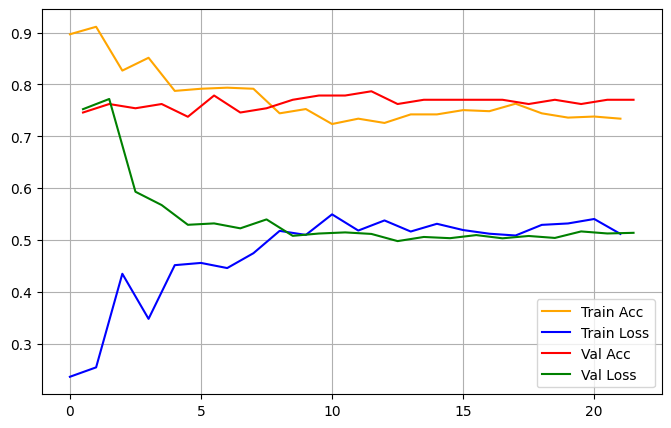

Epoch 1/100
16/16 [==============================] - 6s 27ms/step - loss: 0.3399 - accuracy: 0.8701 - val_loss: 0.6113 - val_accuracy: 0.7787
Epoch 2/100
16/16 [==============================] - 0s 8ms/step - loss: 0.3577 - accuracy: 0.8660 - val_loss: 0.6862 - val_accuracy: 0.7459
Epoch 3/100
16/16 [==============================] - 0s 8ms/step - loss: 0.4000 - accuracy: 0.8082 - val_loss: 0.5982 - val_accuracy: 0.7705
Epoch 4/100
16/16 [==============================] - 0s 7ms/step - loss: 0.3888 - accuracy: 0.8186 - val_loss: 0.5736 - val_accuracy: 0.7541
Epoch 5/100
16/16 [==============================] - 0s 7ms/step - loss: 0.4362 - accuracy: 0.7876 - val_loss: 0.5740 - val_accuracy: 0.7459
Epoch 6/100
16/16 [==============================] - 0s 8ms/step - loss: 0.4410 - accuracy: 0.8062 - val_loss: 0.5518 - val_accuracy: 0.7623
Epoch 7/100
16/16 [==============================] - 0s 8ms/step - loss: 0.4407 - accuracy: 0.8021 - val_loss: 0.5689 - val_accuracy: 0.7705
Epoch 8/100


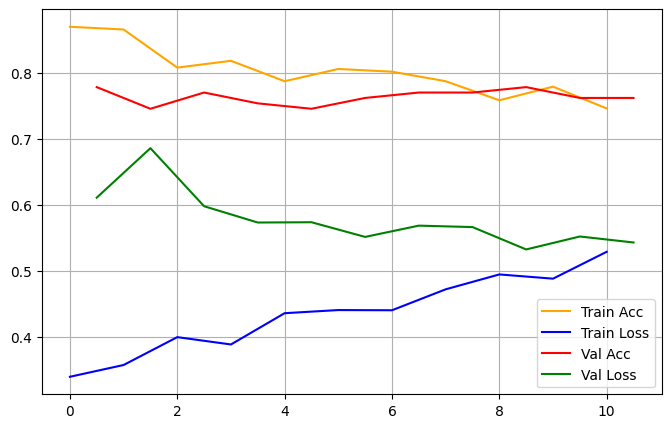

Epoch 1/120
16/16 [==============================] - 7s 28ms/step - loss: 0.2455 - accuracy: 0.9072 - val_loss: 0.7626 - val_accuracy: 0.7377
Epoch 2/120
16/16 [==============================] - 0s 8ms/step - loss: 0.3756 - accuracy: 0.8515 - val_loss: 0.6526 - val_accuracy: 0.7787
Epoch 3/120
16/16 [==============================] - 0s 8ms/step - loss: 0.3966 - accuracy: 0.8247 - val_loss: 0.5459 - val_accuracy: 0.7787
Epoch 4/120
16/16 [==============================] - 0s 8ms/step - loss: 0.4017 - accuracy: 0.8041 - val_loss: 0.5392 - val_accuracy: 0.7869
Epoch 5/120
16/16 [==============================] - 0s 8ms/step - loss: 0.4244 - accuracy: 0.8041 - val_loss: 0.5148 - val_accuracy: 0.8033
Epoch 6/120
16/16 [==============================] - 0s 8ms/step - loss: 0.4294 - accuracy: 0.7979 - val_loss: 0.5460 - val_accuracy: 0.7869
Epoch 7/120
16/16 [==============================] - 0s 8ms/step - loss: 0.4477 - accuracy: 0.8000 - val_loss: 0.5438 - val_accuracy: 0.7705
Epoch 8/120


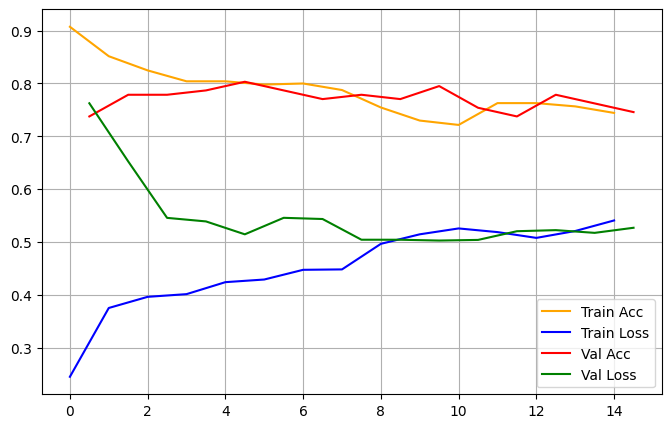

[[8, 0.7786885499954224], [10, 0.7868852615356445], [20, 0.7704917788505554], [50, 0.7868852615356445], [100, 0.7786885499954224], [120, 0.8032786846160889]]


In [85]:
# Learning rate
res=[]
for epochs in [8,10,20,50,100,120]:
    valacc, history, discard = tune_hyperparamiter(epochs,batchsize,optimizer, learningrate)
    plot_history(history)
    res += [[epochs,valacc]]
print(res)

In [86]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Compile the model
model.compile(optimizer=keras.optimizers.SGD(0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Define early stopping & model checkpointing
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)


# Train the model
history = model.fit(X, y,
                    epochs=120,              
                    batch_size=batchsize,          # Using mini-batch gradient descent
                    validation_data=(X_val, y_val),
                    callbacks=[early_stopping],
                    verbose=1)              

# Load the best model (optional but recommended)
model = keras.models.load_model("best_model.h5")

Epoch 1/120
16/16 [==============================] - 3s 27ms/step - loss: 0.3166 - accuracy: 0.9010 - val_loss: 0.5299 - val_accuracy: 0.7951
Epoch 2/120
16/16 [==============================] - 0s 8ms/step - loss: 0.3508 - accuracy: 0.8825 - val_loss: 0.5525 - val_accuracy: 0.7705
Epoch 3/120
16/16 [==============================] - 0s 7ms/step - loss: 0.3513 - accuracy: 0.8515 - val_loss: 0.5592 - val_accuracy: 0.7623
Epoch 4/120
16/16 [==============================] - 0s 7ms/step - loss: 0.3393 - accuracy: 0.8557 - val_loss: 0.5676 - val_accuracy: 0.7459
Epoch 5/120
16/16 [==============================] - 0s 7ms/step - loss: 0.3501 - accuracy: 0.8433 - val_loss: 0.5688 - val_accuracy: 0.7459
Epoch 6/120
16/16 [==============================] - 0s 7ms/step - loss: 0.4274 - accuracy: 0.7876 - val_loss: 0.5721 - val_accuracy: 0.7459
Epoch 7/120
16/16 [==============================] - 0s 8ms/step - loss: 0.4361 - accuracy: 0.8000 - val_loss: 0.5749 - val_accuracy: 0.7459
Epoch 8/120


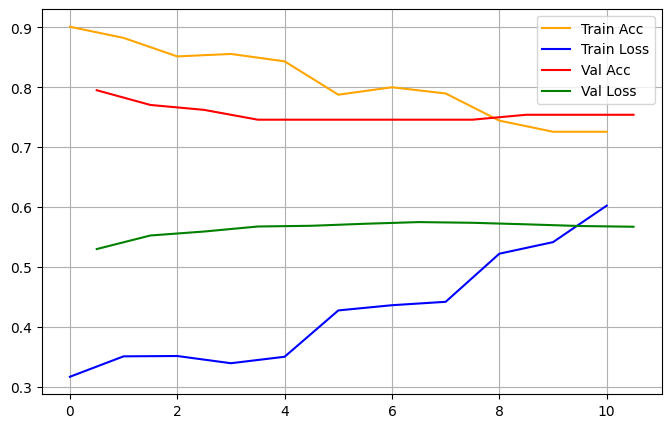

In [87]:
plot_history(history)

In [88]:
# Evaluate the model
loss, accuracy = model.evaluate(X_val, y_val)
print("Accuracy:", accuracy)

4/4 [==============================] - 0s 6ms/step - loss: 0.4911 - accuracy: 0.8115
Accuracy: 0.811475396156311


In [89]:
prediction=model.predict(X_test)

5/5 [==============================] - 0s 4ms/step


In [90]:
prediction

array([[0.7310198 ],
       [0.3013461 ],
       [0.6833448 ],
       [0.88953155],
       [0.47484097],
       [0.72639817],
       [0.15789856],
       [0.9109927 ],
       [0.94031024],
       [0.9307452 ],
       [0.3497505 ],
       [0.2706447 ],
       [0.7317466 ],
       [0.8078572 ],
       [0.89231855],
       [0.5062357 ],
       [0.8247394 ],
       [0.77867275],
       [0.95960087],
       [0.43463966],
       [0.40644476],
       [0.35390523],
       [0.7919699 ],
       [0.36400068],
       [0.7358067 ],
       [0.34467372],
       [0.43063003],
       [0.7514942 ],
       [0.57321054],
       [0.23391166],
       [0.866808  ],
       [0.53535646],
       [0.42132673],
       [0.9387633 ],
       [0.6355561 ],
       [0.29875165],
       [0.49778914],
       [0.9183148 ],
       [0.6243882 ],
       [0.48990422],
       [0.9836955 ],
       [0.16604444],
       [0.46017268],
       [0.58829165],
       [0.85024   ],
       [0.6768027 ],
       [0.75742954],
       [0.707

In [91]:
threshold = 0.5
binary_predictions = (prediction > threshold).astype(int)


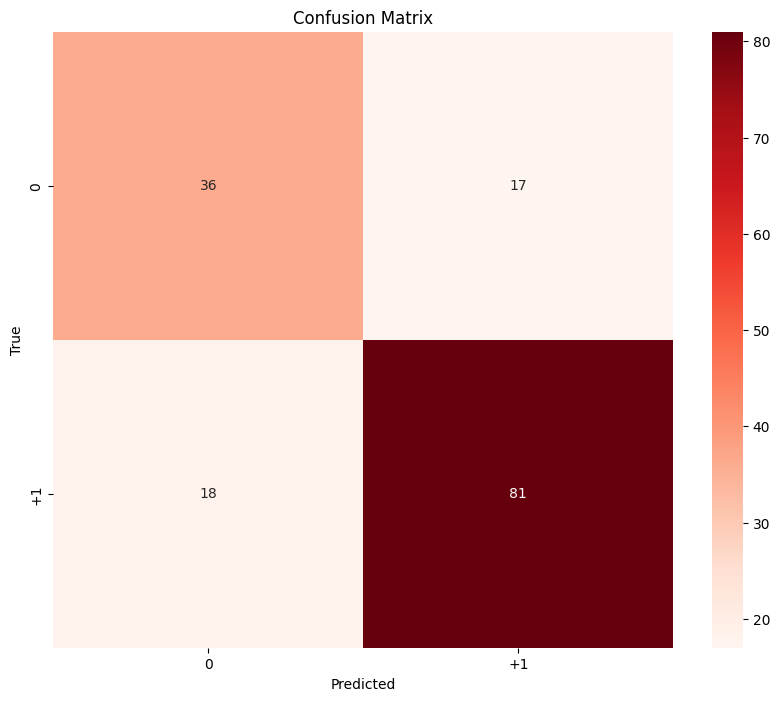

In [92]:
# Get the Confusion matrix of the best model 

from sklearn.metrics import confusion_matrix
import seaborn as sn

# Calculate the Normalized confusion matrix
cm = confusion_matrix(y_true=y_test, y_pred=binary_predictions, labels=[0, +1])

# Create a larger figure
plt.figure(figsize=(10, 8))

# Create the heatmap
sn.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['0', '+1'], yticklabels=[ '0','+1'])

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [93]:
# Get the accuracy using the test set 
accuracy_class = np.diag(cm).sum() / cm.sum()
accuracy_class 

0.7697368421052632

In [94]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

# Assuming you have the true labels in y_test and predictions in sgd_pred
f1_score = f1_score(y_test, binary_predictions)
print("f1 score:", f1_score)
# recall
recall =recall_score(y_test, binary_predictions)
print("recall:", recall)

# precision
precision= precision_score(y_test, binary_predictions)
print("precision:", precision)

f1 score: 0.8223350253807107
recall: 0.8181818181818182
precision: 0.826530612244898
